In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [4]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_curve, roc_auc_score, precision_score, recall_score, f1_score
    )

In [5]:
import warnings
warnings.filterwarnings('ignore') # Suppress warnings for cleaner output

In [6]:
print("--- 1. Data Loading & Initial Inspection ---")
try:
  df = sns.load_dataset('penguins')
  print("Dataset loaded successfully from seaborn.")
except Exception as e:
  print(f"Could not load from seaborn: {e}. Trying direct download (ensure URL is correct).")
  # Fallback if seaborn load fails (e.g., if working offline or old seaborn version)
  # You might need to manually download 'penguins.csv' and upload to Colab
  # or use a raw GitHub link:
  df = pd.read_csv("https://raw.githubusercontent.com/allisonhorst/palmerpenguins/master/inst/extdata/penguins.csv")
  print("Dataset loaded successfully from direct CSV URL.")

--- 1. Data Loading & Initial Inspection ---
Dataset loaded successfully from seaborn.


In [7]:
print("\nFirst 5 rows of the dataset:")
print(df.head())


First 5 rows of the dataset:
  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female  


In [8]:
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [9]:
print("\nMissing values count per column:")
print(df.isnull().sum())


Missing values count per column:
species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64


In [10]:
print("\nDescriptive statistics:")
print(df.describe())


Descriptive statistics:
       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      342.000000     342.000000         342.000000   342.000000
mean        43.921930      17.151170         200.915205  4201.754386
std          5.459584       1.974793          14.061714   801.954536
min         32.100000      13.100000         172.000000  2700.000000
25%         39.225000      15.600000         190.000000  3550.000000
50%         44.450000      17.300000         197.000000  4050.000000
75%         48.500000      18.700000         213.000000  4750.000000
max         59.600000      21.500000         231.000000  6300.000000


In [ ]:
print("\n--- 2. Data Cleaning, Preprocessing & Wrangling ---")

In [11]:
df_cleaned = df.dropna().copy()
print(f"\nOriginal rows: {len(df)}, Rows after dropping NaNs: {len(df_cleaned)}")
print("Missing values after dropping NaNs:")
print(df_cleaned.isnull().sum())


Original rows: 344, Rows after dropping NaNs: 333
Missing values after dropping NaNs:
species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64


In [13]:
print("\nFeature Engineering (Conceptual):")
print("For this tutorial, we will not create new features, but this phase would involve:")
print(" - Combining existing features (e.g., ratios, differences)")
print(" - Extracting information (e.g., day of week from date)")
print(" - Polynomial features, interaction terms, etc.")


Feature Engineering (Conceptual):
For this tutorial, we will not create new features, but this phase would involve:
 - Combining existing features (e.g., ratios, differences)
 - Extracting information (e.g., day of week from date)
 - Polynomial features, interaction terms, etc.


In [14]:
le = LabelEncoder()
df_cleaned['species_encoded'] = le.fit_transform(df_cleaned['species'])
print(f"\nSpecies mapping: {list(le.classes_)} -> {list(range(len(le.classes_)))}")


Species mapping: ['Adelie', 'Chinstrap', 'Gentoo'] -> [0, 1, 2]


In [15]:
X = df_cleaned.drop(['species', 'species_encoded'], axis=1)
y = df_cleaned['species_encoded']

In [16]:
categorical_features = ['island', 'sex']
numerical_features = ['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']

In [19]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-hot encode categorical
    ]
)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print(f"\nShape of X_train: {X_train.shape}")
print(f"Shape of X_test: {X_test.shape}")
print(f"Shape of y_train: {y_train.shape}")
print(f"Shape of y_test: {y_test.shape}")


Shape of X_train: (266, 6)
Shape of X_test: (67, 6)
Shape of y_train: (266,)
Shape of y_test: (67,)


In [21]:
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [22]:
ohe_feature_names = preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features)
all_feature_names = numerical_features + list(ohe_feature_names)

print("\nX_train_processed (first 5 rows, showing transformed data):")
print(pd.DataFrame(X_train_processed, columns=all_feature_names).head())


X_train_processed (first 5 rows, showing transformed data):
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  \
0        0.167325      -1.992311           0.834781     1.082394   
1        1.227050       1.255521           0.121247    -0.215642   
2        0.879899      -0.520638           1.476961     2.194997   
3       -0.472164       0.646552           0.049894    -0.431982   
4       -1.166467       1.052531          -1.448527    -1.142811   

   island_Biscoe  island_Dream  island_Torgersen  sex_Female  sex_Male  
0            1.0           0.0               0.0         1.0       0.0  
1            0.0           1.0               0.0         0.0       1.0  
2            1.0           0.0               0.0         0.0       1.0  
3            0.0           0.0               1.0         0.0       1.0  
4            0.0           1.0               0.0         1.0       0.0  



--- 3. Exploratory Data Analysis (EDA) ---

Generating Pairplot (relationships between numerical features by species)...


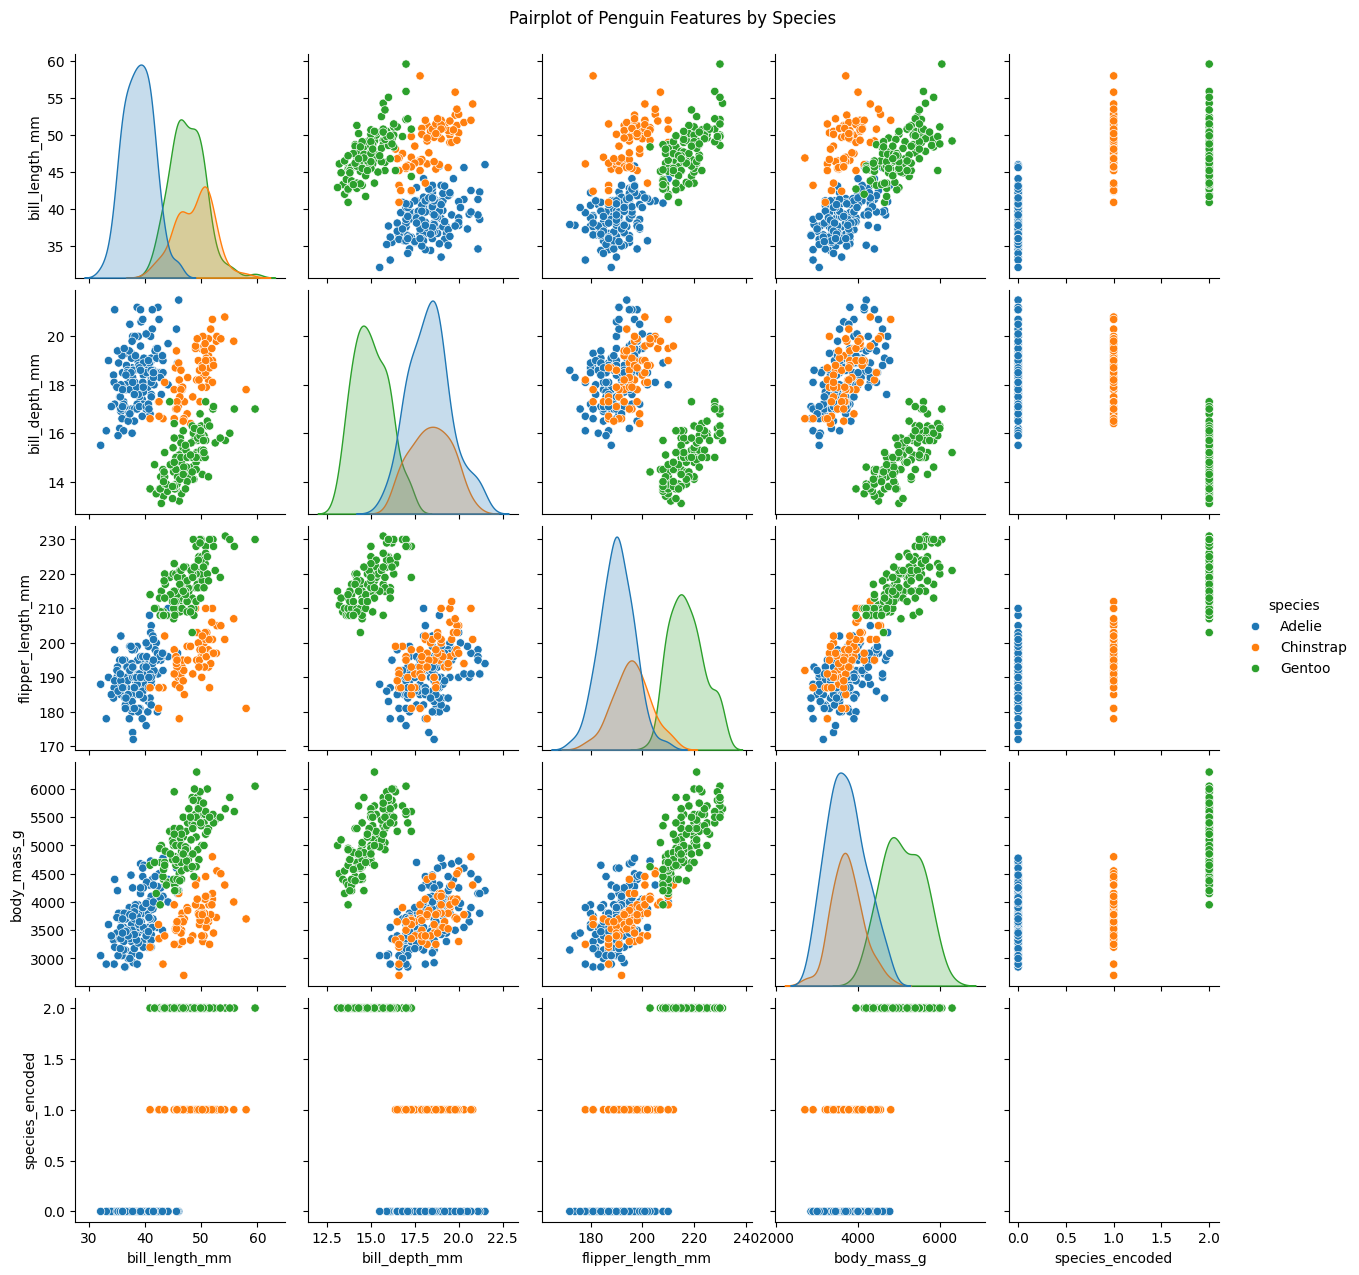

In [23]:
print("\n--- 3. Exploratory Data Analysis (EDA) ---")
print("\nGenerating Pairplot (relationships between numerical features by species)...")
sns.pairplot(df_cleaned, hue='species', height=2.5, diag_kind='kde')
plt.suptitle('Pairplot of Penguin Features by Species', y=1.02)
plt.show()


Generating Correlation Heatmap for numerical features...


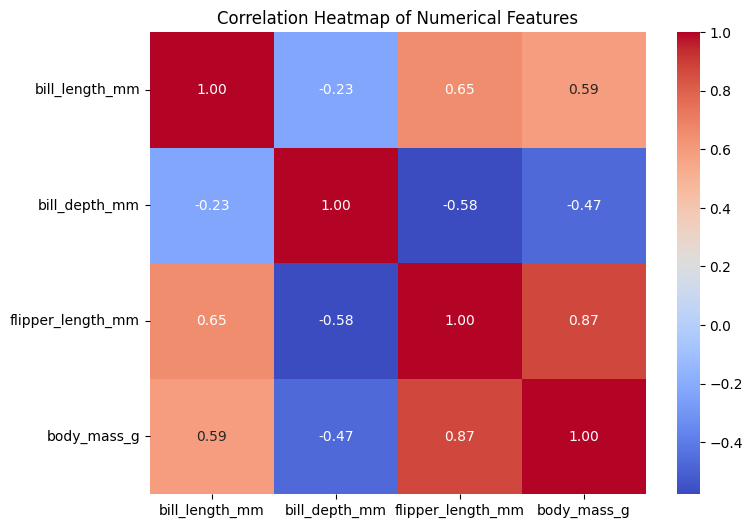

In [24]:
print("\nGenerating Correlation Heatmap for numerical features...")
plt.figure(figsize=(8, 6))
sns.heatmap(df_cleaned[numerical_features].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

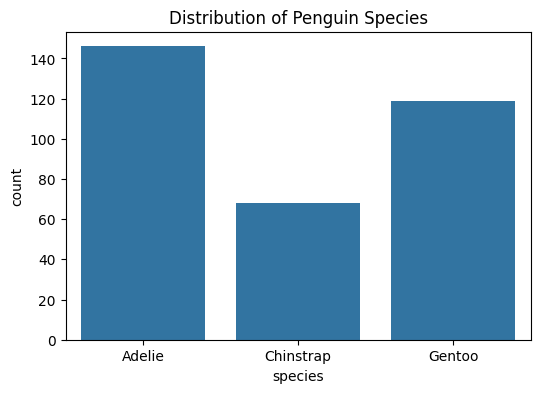

In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='species', data=df_cleaned)
plt.title('Distribution of Penguin Species')
plt.show()


Generating Boxplots for numerical features by species...


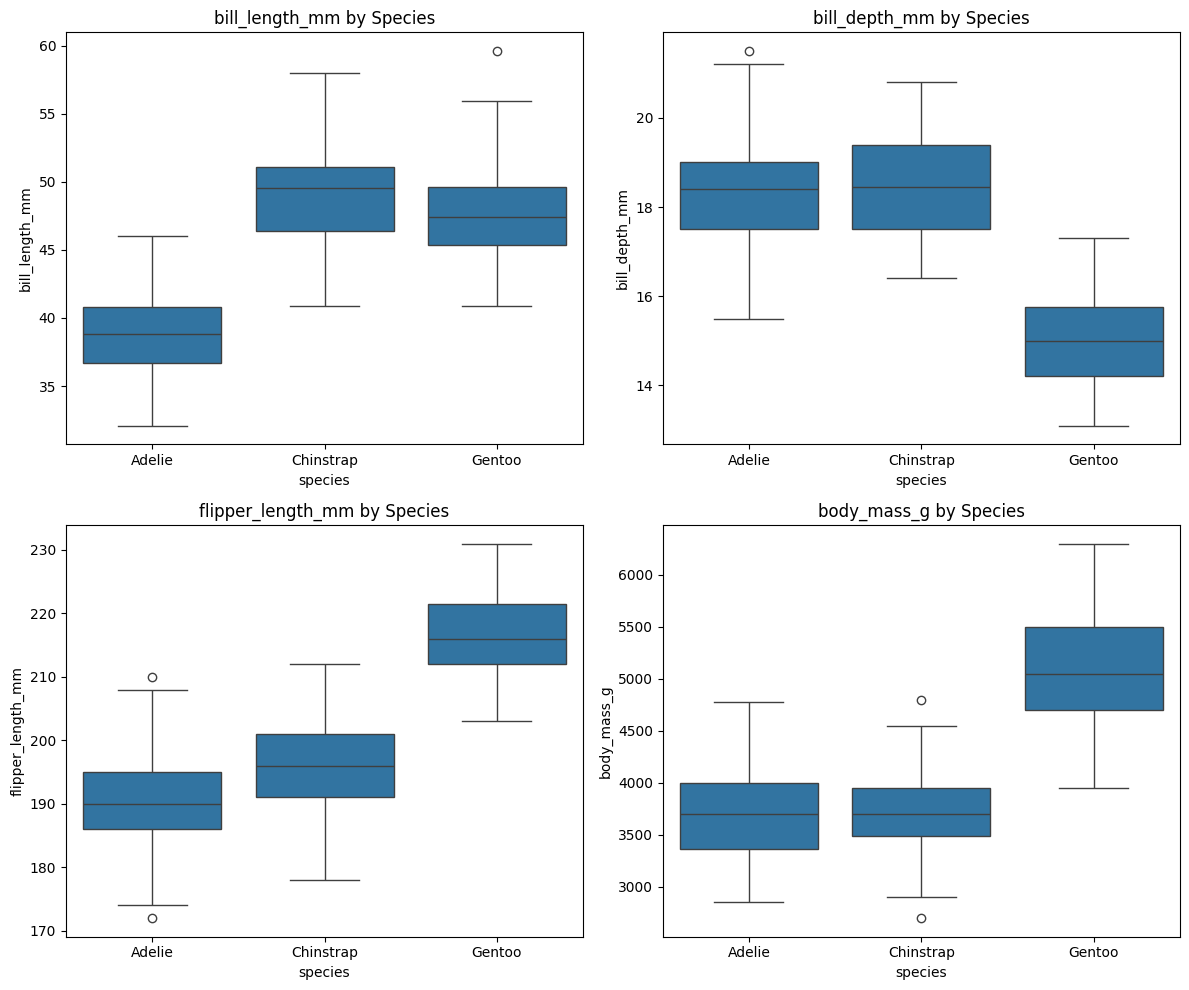

In [26]:
print("\nGenerating Boxplots for numerical features by species...")
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
for i, feature in enumerate(numerical_features):
  row = i // 2
  col = i % 2
  sns.boxplot(x='species', y=feature, data=df_cleaned, ax=axes[row, col])
  axes[row, col].set_title(f'{feature} by Species')
plt.tight_layout()
plt.show()

In [27]:
print("\n--- 5. Model Training ---")
classifiers = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Support Vector Machine (SVC)': SVC(random_state=42, probability=True), # probability=True for ROC curve
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier()
}
trained_models = {}

for name, model in classifiers.items():
    # The following lines are correctly indented to be part of the for loop
    print(f"\nTraining {name}...")
    model.fit(X_train_processed, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

print("\nAll models have been trained and stored in the 'trained_models' dictionary.")
print("The keys of the trained_models dictionary are:", list(trained_models.keys()))


--- 5. Model Training ---

Training Logistic Regression...
Logistic Regression trained.

Training Decision Tree...
Decision Tree trained.

Training Random Forest...
Random Forest trained.

Training Support Vector Machine (SVC)...
Support Vector Machine (SVC) trained.

Training Gradient Boosting...
Gradient Boosting trained.

Training K-Nearest Neighbors...
K-Nearest Neighbors trained.

All models have been trained and stored in the 'trained_models' dictionary.
The keys of the trained_models dictionary are: ['Logistic Regression', 'Decision Tree', 'Random Forest', 'Support Vector Machine (SVC)', 'Gradient Boosting', 'K-Nearest Neighbors']



--- 5. Model Evaluation ---

--- Logistic Regression Performance ---
Accuracy: 0.9851

Classification Report:
               precision    recall  f1-score   support

      Adelie       1.00      0.97      0.98        29
   Chinstrap       0.93      1.00      0.97        14
      Gentoo       1.00      1.00      1.00        24

    accuracy                           0.99        67
   macro avg       0.98      0.99      0.98        67
weighted avg       0.99      0.99      0.99        67


--- Decision Tree Performance ---
Accuracy: 0.9254

Classification Report:
               precision    recall  f1-score   support

      Adelie       0.93      0.90      0.91        29
   Chinstrap       0.82      1.00      0.90        14
      Gentoo       1.00      0.92      0.96        24

    accuracy                           0.93        67
   macro avg       0.92      0.94      0.92        67
weighted avg       0.93      0.93      0.93        67


--- Random Forest Performance ---
Accuracy: 1.00

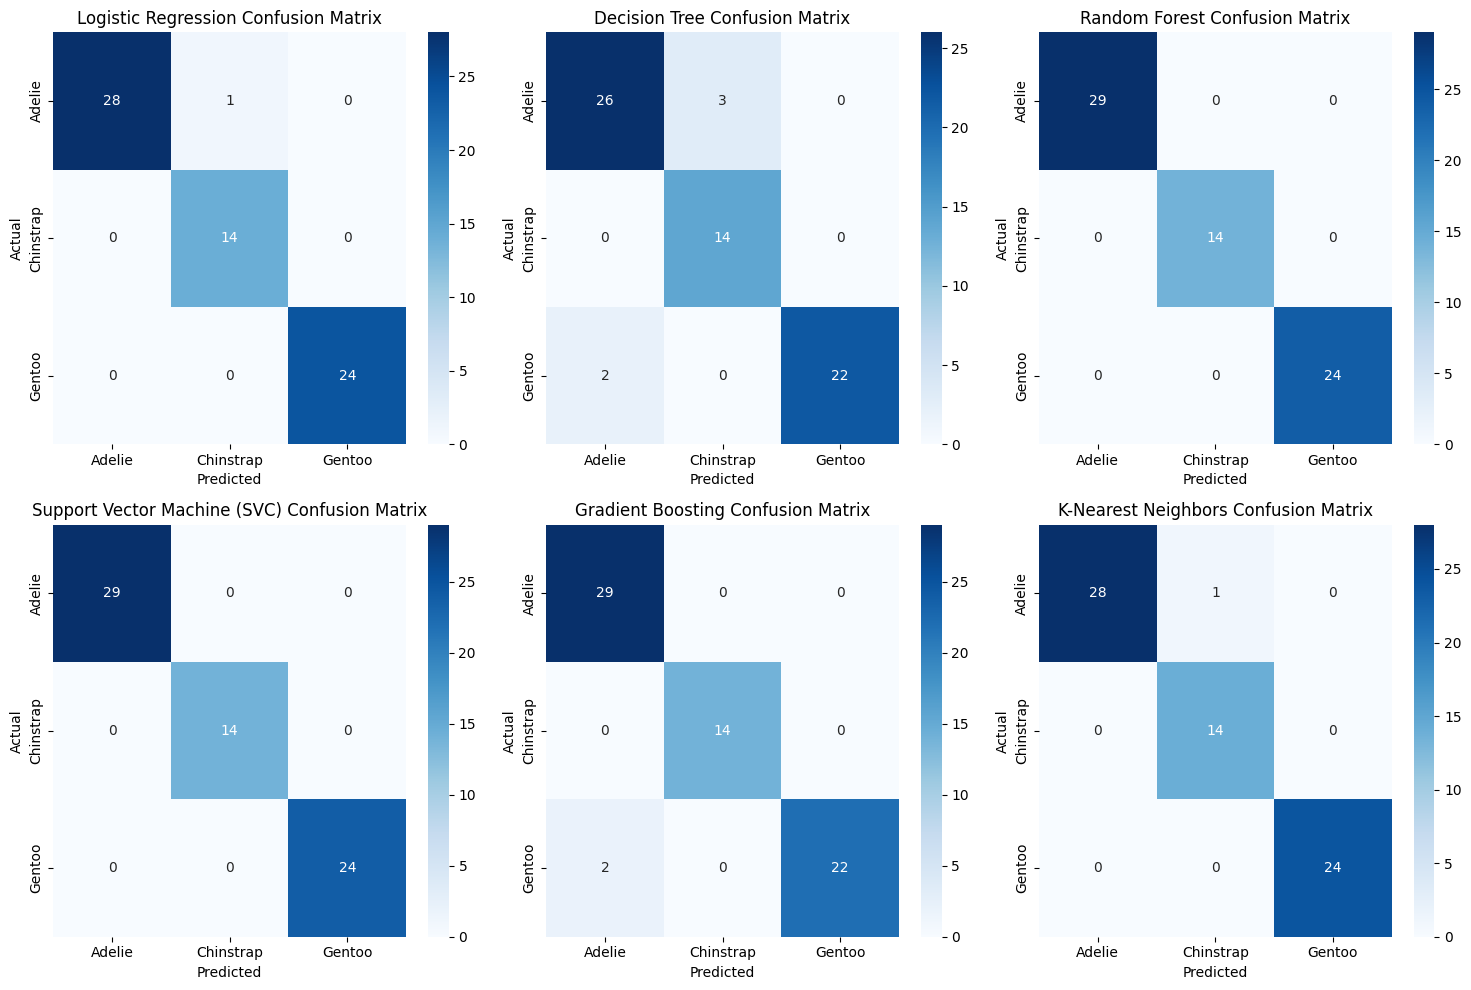

In [28]:
print("\n--- 5. Model Evaluation ---")
results = {}
plt.figure(figsize=(15, 10))
plt_idx = 1
for name, model in trained_models.items():
  y_pred = model.predict(X_test_processed)
  accuracy = accuracy_score(y_test, y_pred)
  report = classification_report(y_test, y_pred, target_names=le.classes_)
  cm = confusion_matrix(y_test, y_pred)
  results[name] = { 'accuracy': accuracy, 'report': report, 'confusion_matrix': cm }
  print(f"\n--- {name} Performance ---")
  print(f"Accuracy: {accuracy:.4f}")
  print("\nClassification Report:\n", report)
  # Confusion Matrix Heatmap
  plt.subplot(2, 3, plt_idx)
  sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
  plt.title(f'{name} Confusion Matrix')
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt_idx += 1
plt.tight_layout()
plt.show()

In [29]:
print("\n--- ROC Curves (One-vs-Rest) ---")
plt.figure(figsize=(10, 8))


--- ROC Curves (One-vs-Rest) ---


<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

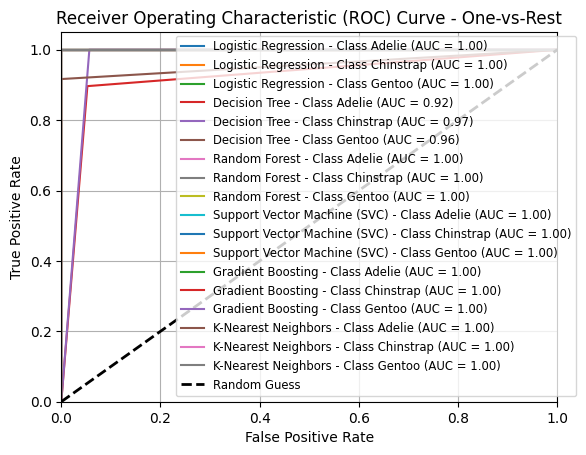


--- Summary of Model Accuracies ---
Logistic Regression: Accuracy = 0.9851
Decision Tree: Accuracy = 0.9254
Random Forest: Accuracy = 1.0000
Support Vector Machine (SVC): Accuracy = 1.0000
Gradient Boosting: Accuracy = 0.9701
K-Nearest Neighbors: Accuracy = 0.9851


In [30]:
for name, model in trained_models.items():
    if hasattr(model, "predict_proba"): # Check if model supports probability prediction
        y_score = model.predict_proba(X_test_processed)
        n_classes = len(le.classes_)

        # Compute ROC curve and ROC area for each class
        fpr = dict()
        tpr = dict()
        roc_auc = dict()
        for i in range(n_classes):
            # Binarize the true labels for OvR
            y_test_bin = (y_test == i).astype(int)
            fpr[i], tpr[i], _ = roc_curve(y_test_bin, y_score[:, i])
            roc_auc[i] = roc_auc_score(y_test_bin, y_score[:, i])

        # Plot all ROC curves for each class for this model
        for i in range(n_classes):
            plt.plot(fpr[i], tpr[i], label=f'{name} - Class {le.classes_[i]} (AUC = {roc_auc[i]:.2f})')

# Add the reference line for a random guess
plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve - One-vs-Rest')
plt.legend(loc="lower right", bbox_to_anchor=(1.05, 0), fontsize='small', ncol=1)
plt.grid(True)
plt.show()

print("\n--- Summary of Model Accuracies ---")
for name, data in results.items():
    print(f"{name}: Accuracy = {data['accuracy']:.4f}")

In [31]:
print("\n--- 6. Prediction & Decision Making ---")
best_model_name = 'Random Forest'
best_model = trained_models[best_model_name]
print(f"\nSelected best model: {best_model_name}")


--- 6. Prediction & Decision Making ---

Selected best model: Random Forest


In [33]:
new_penguin_data = pd.DataFrame([{ 'bill_length_mm': 39.5, 'bill_depth_mm': 17.5, 'flipper_length_mm': 190.0, 'body_mass_g': 3500.0, 'island': 'Torgersen', 'sex': 'Male' }])
print("\nNew Penguin Data for Prediction:")
print(new_penguin_data)


New Penguin Data for Prediction:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     island  \
0            39.5           17.5              190.0       3500.0  Torgersen   

    sex  
0  Male  


In [34]:
new_penguin_processed = preprocessor.transform(new_penguin_data)
predicted_species_encoded = best_model.predict(new_penguin_processed)
predicted_species = le.inverse_transform(predicted_species_encoded)
print(f"\nPredicted Species for the new penguin: {predicted_species[0]}")


Predicted Species for the new penguin: Adelie


In [35]:
if hasattr(best_model, "predict_proba"):
  predicted_proba = best_model.predict_proba(new_penguin_processed)
  proba_df = pd.DataFrame(predicted_proba, columns=le.classes_)
  print("\nPrediction Probabilities:")
  print(proba_df)


Prediction Probabilities:
   Adelie  Chinstrap  Gentoo
0     1.0        0.0     0.0


In [37]:
print("\n--- Decision Making based on Model Results ---")
print("In this scenario, a highly accurate model for penguin species classification can be used for:")
print("1. **Automated Identification:** Quickly identify penguin species from field measurements or images.")
print("2. **Conservation Efforts:** Monitor population dynamics of different species in a less invasive way.")
print("3. **Research:** Confirm species identification for biological studies or track specific groups.")
print("4. **Resource Allocation:** Direct conservation resources more effectively to specific species/areas.")
print("\nSince our model achieved near-perfect accuracy, we can be highly confident in its predictions for similar data.")
print("However, always consider:")
print("- **Data Drift:** If penguin characteristics change over time, the model might need retraining.")
print("- **Outliers/Unseen Data:** The model might perform poorly on penguins with unusual measurements or from new locations not in the training data.")
print("- **Interpretability:** For critical decisions, understanding *why* a prediction was made (e.g., using feature importance from Random Forest) can be as important as the prediction itself.")


--- Decision Making based on Model Results ---
In this scenario, a highly accurate model for penguin species classification can be used for:
1. **Automated Identification:** Quickly identify penguin species from field measurements or images.
2. **Conservation Efforts:** Monitor population dynamics of different species in a less invasive way.
3. **Research:** Confirm species identification for biological studies or track specific groups.
4. **Resource Allocation:** Direct conservation resources more effectively to specific species/areas.

Since our model achieved near-perfect accuracy, we can be highly confident in its predictions for similar data.
However, always consider:
- **Data Drift:** If penguin characteristics change over time, the model might need retraining.
- **Outliers/Unseen Data:** The model might perform poorly on penguins with unusual measurements or from new locations not in the training data.
- **Interpretability:** For critical decisions, understanding *why* a predic

In [39]:
import pandas as pd

# 10 new penguin data samples
new_penguin_data = pd.DataFrame([
    { 'bill_length_mm': 39.5, 'bill_depth_mm': 17.5, 'flipper_length_mm': 190.0, 'body_mass_g': 3500.0, 'island': 'Torgersen', 'sex': 'Male' },
    { 'bill_length_mm': 46.0, 'bill_depth_mm': 21.0, 'flipper_length_mm': 210.0, 'body_mass_g': 4200.0, 'island': 'Biscoe', 'sex': 'Female' },
    { 'bill_length_mm': 50.5, 'bill_depth_mm': 15.3, 'flipper_length_mm': 222.0, 'body_mass_g': 5000.0, 'island': 'Dream', 'sex': 'Male' },
    { 'bill_length_mm': 36.2, 'bill_depth_mm': 18.9, 'flipper_length_mm': 181.0, 'body_mass_g': 3200.0, 'island': 'Torgersen', 'sex': 'Female' },
    { 'bill_length_mm': 42.1, 'bill_depth_mm': 19.5, 'flipper_length_mm': 200.0, 'body_mass_g': 3800.0, 'island': 'Biscoe', 'sex': 'Male' },
    { 'bill_length_mm': 45.6, 'bill_depth_mm': 20.2, 'flipper_length_mm': 210.0, 'body_mass_g': 3950.0, 'island': 'Dream', 'sex': 'Female' },
    { 'bill_length_mm': 48.0, 'bill_depth_mm': 16.8, 'flipper_length_mm': 218.0, 'body_mass_g': 4700.0, 'island': 'Biscoe', 'sex': 'Male' },
    { 'bill_length_mm': 37.8, 'bill_depth_mm': 18.5, 'flipper_length_mm': 192.0, 'body_mass_g': 3450.0, 'island': 'Torgersen', 'sex': 'Female' },
    { 'bill_length_mm': 41.3, 'bill_depth_mm': 17.7, 'flipper_length_mm': 196.0, 'body_mass_g': 3600.0, 'island': 'Dream', 'sex': 'Male' },
    { 'bill_length_mm': 52.0, 'bill_depth_mm': 20.5, 'flipper_length_mm': 225.0, 'body_mass_g': 5200.0, 'island': 'Biscoe', 'sex': 'Female' }
])

print("\nNew Penguin Data for Prediction:")
print(new_penguin_data)

# Process and predict species
new_penguin_processed = preprocessor.transform(new_penguin_data)
predicted_species_encoded = best_model.predict(new_penguin_processed)
predicted_species = le.inverse_transform(predicted_species_encoded)

# Show predictions
for i, species in enumerate(predicted_species):
    print(f"Penguin {i+1}: Predicted Species = {species}")



New Penguin Data for Prediction:
   bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     island  \
0            39.5           17.5              190.0       3500.0  Torgersen   
1            46.0           21.0              210.0       4200.0     Biscoe   
2            50.5           15.3              222.0       5000.0      Dream   
3            36.2           18.9              181.0       3200.0  Torgersen   
4            42.1           19.5              200.0       3800.0     Biscoe   
5            45.6           20.2              210.0       3950.0      Dream   
6            48.0           16.8              218.0       4700.0     Biscoe   
7            37.8           18.5              192.0       3450.0  Torgersen   
8            41.3           17.7              196.0       3600.0      Dream   
9            52.0           20.5              225.0       5200.0     Biscoe   

      sex  
0    Male  
1  Female  
2    Male  
3  Female  
4    Male  
5  Female  
6    Male  
